In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import joblib 

from imblearn.combine import SMOTEENN

In [17]:
data = pd.read_csv("./real_final_201806_11.csv")
print('dataset shape:', data.shape)

dataset shape: (23133, 49)


In [18]:
data = data.drop(['JOIN_KEY'], axis=1)
print('dataset shape:', data.shape)

dataset shape: (23133, 48)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23133 entries, 0 to 23132
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          23133 non-null  int64  
 1   AGE             23133 non-null  int64  
 2   LN_AMT_SUM      23133 non-null  int64  
 3   LN_AMT_AVG      23133 non-null  float64
 4   LN_AMT_AVG_INC  23133 non-null  float64
 5   LN_CD_2_0       23133 non-null  int64  
 6   LN_CD_2_100     23133 non-null  int64  
 7   LN_CD_2_150     23133 non-null  int64  
 8   LN_CD_2_170     23133 non-null  int64  
 9   LN_CD_2_200     23133 non-null  int64  
 10  LN_CD_2_210     23133 non-null  int64  
 11  LN_CD_2_220     23133 non-null  int64  
 12  LN_CD_2_230     23133 non-null  int64  
 13  LN_CD_2_240     23133 non-null  int64  
 14  LN_CD_2_245     23133 non-null  int64  
 15  LN_CD_2_250     23133 non-null  int64  
 16  LN_CD_2_270     23133 non-null  int64  
 17  LN_CD_2_271     23133 non-null 

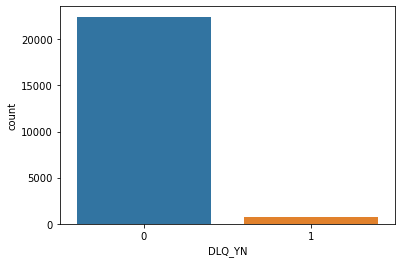

In [20]:
sns.countplot(x = 'DLQ_YN', data=data)
plt.show()

In [21]:
data.describe()

,GENDER,AGE,LN_AMT_SUM,LN_AMT_AVG,LN_AMT_AVG_INC,LN_CD_2_0,LN_CD_2_100,LN_CD_2_150,LN_CD_2_170,LN_CD_2_200,...,INT_BENCH,INT_COFIX,CSI,CPI,LAI,M2,UNEMP_RATE,SALES_PRICE,GDP,DLQ_YN
count,23133.000000,23133.000000,2.313300e+04,2.313300e+04,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,...,2.313300e+04,2.313300e+04,2.313300e+04,2.313300e+04,23133.0,2.313300e+04,2.313300e+04,2.313300e+04,2.313300e+04,23133.000000
mean,1.425021,47.478062,4.838986e+05,3.872461e+04,174.958364,0.697791,0.708685,0.073834,0.000821,0.071024,...,1.541667e+00,1.898333e+00,1.008500e+02,1.047883e+02,-13.0,1.143990e+05,3.616667e+00,9.613183e+01,1.725373e+06,0.030995
std,0.494357,13.709411,7.250609e+05,6.362175e+04,4739.113419,1.407753,0.874342,0.289738,0.030119,0.271436,...,4.274451e-13,7.103360e-13,4.388407e-11,2.579326e-11,0.0,3.846154e-08,1.893637e-12,6.053955e-12,7.532234e-07,0.173307
min,1.000000,20.000000,6.000000e+01,1.000000e+01,-136450.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.541667e+00,1.898333e+00,1.008500e+02,1.047883e+02,-13.0,1.143990e+05,3.616667e+00,9.613183e+01,1.725373e+06,0.000000
25%,1.000000,37.000000,6.600000e+04,6.150000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.541667e+00,1.898333e+00,1.008500e+02,1.047883e+02,-13.0,1.143990e+05,3.616667e+00,9.613183e+01,1.725373e+06,0.000000
50%,1.000000,47.000000,2.040000e+05,1.679028e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.541667e+00,1.898333e+00,1.008500e+02,1.047883e+02,-13.0,1.143990e+05,3.616667e+00,9.613183e+01,1.725373e+06,0.000000
75%,2.000000,57.000000,6.120000e+05,4.800000e+04,34.920635,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.541667e+00,1.898333e+00,1.008500e+02,1.047883e+02,-13.0,1.143990e+05,3.616667e+00,9.613183e+01,1.725373e+06,0.000000
max,2.000000,84.000000,1.216860e+07,1.900000e+06,133333.333300,22.000000,14.000000,4.000000,2.000000,4.000000,...,1.541667e+00,1.898333e+00,1.008500e+02,1.047883e+02,-13.0,1.143990e+05,3.616667e+00,9.613183e+01,1.725373e+06,1.000000


In [22]:
X = data.drop(['DLQ_YN'], axis=1)
y = data['DLQ_YN']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(18506, 47)

In [25]:
X_test.shape

(4627, 47)

# SMOTE ENN 

In [29]:
r1 = X_train.shape[0] ; r2  = X_test.shape[0]
c1 = X_train.shape[1]; c2 = X_test.shape[1]
print("Train Data has {0} number of rows and {1} of columns".format(r1,c1))
print("Test Data has {0} number of rows and {1} of columns".format(r2,c2))

Train Data has 18506 number of rows and 47 of columns
Test Data has 4627 number of rows and 47 of columns


In [30]:
smote = SMOTEENN(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())

print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (18506, 47) (18506,)
SMOTE 적용 전 레이블 값 분포: 
 0    17941
1      565
Name: DLQ_YN, dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (27667, 47) (27667,)
SMOTE 적용 후 레이블 값 분포: 
 1    14565
0    13102
Name: DLQ_YN, dtype: int64


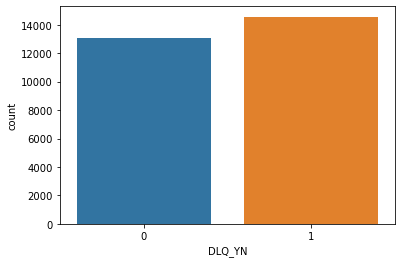

In [31]:
df = pd.DataFrame(y_train_over)
sns.countplot(x = 'DLQ_YN', data=df)
plt.show()

# MODELING

In [32]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()

parameters = {
    'C':[0.3, 0.5, 0.8, 1.20], 
    'max_iter':[1000],
    'penalty': ['l2']
    
}

In [33]:
grid_log = GridSearchCV(log_clf, param_grid=parameters, cv=3, refit=True, return_train_score=True)

#param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_log.fit(X_train_over, y_train_over)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_log.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.3, 'max_iter': 1000, 'penalty': 'l2'}",0.758449,1,0.759948,0.75797,0.757428
1,"{'C': 0.5, 'max_iter': 1000, 'penalty': 'l2'}",0.758449,1,0.759948,0.75797,0.757428
2,"{'C': 0.8, 'max_iter': 1000, 'penalty': 'l2'}",0.758449,1,0.759948,0.75797,0.757428
3,"{'C': 1.2, 'max_iter': 1000, 'penalty': 'l2'}",0.758449,1,0.759948,0.75797,0.757428


In [34]:
print('GridSearchCV 최적 파라미터:', grid_log.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_log.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_log.predict(X_test)
pred_prob = grid_log.predict_proba(X_test)[:,1]
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'C': 0.3, 'max_iter': 1000, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.7584
테스트 데이터 세트 정확도: 0.4936


In [35]:
best_model = grid_log.best_estimator_

In [36]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [37]:
get_clf_eval(y_test, pred, pred_prob)

오차 행렬
[[2149 2326]
 [  17  135]]
정확도: 0.4936, 정밀도: 0.0549, 재현율: 0.8882, F1: 0.1033, AUC:0.7617


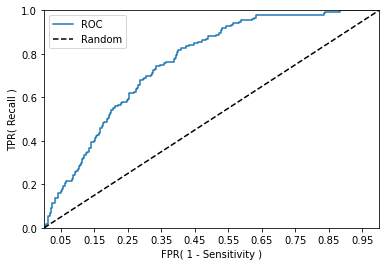

In [38]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, best_model.predict_proba(X_test)[:, 1] )

In [39]:
importance = best_model.coef_[0]

print(importance)


[-1.94873432e-09 -3.92164408e-09  2.51081343e-06 -9.52353589e-05
 -1.15777516e-06  7.15039909e-09  2.62653518e-09 -4.76909441e-10
 -4.36185043e-12 -2.50346828e-10 -1.02221506e-10 -1.34348563e-09
 -2.05042181e-10 -2.58580953e-10 -9.01622672e-11 -5.15851572e-11
 -2.16307128e-10 -4.61971353e-12 -6.28572316e-11 -5.13327994e-10
 -1.31651073e-10 -4.90961618e-11 -1.72292226e-11 -2.79119483e-11
 -3.54021998e-10 -8.20895190e-10  5.94451035e-09 -5.35449058e-11
 -2.12361441e-10  7.53029699e-10  6.73134080e-10 -7.13432831e-10
  3.70832662e-10  1.21637281e-09  1.45080192e-10 -3.12653334e-09
 -1.32385486e-10  7.00948058e-13  5.40224091e-13  6.65205664e-13
  3.53394159e-11  3.67194694e-11 -4.55540314e-12  4.00872089e-08
  1.26733652e-12  3.36860966e-11  6.04597800e-07]


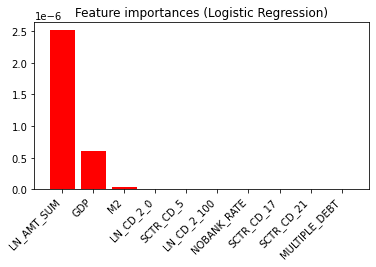

In [40]:
coefs = best_model.coef_[0]
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train_over.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

# MODEL SAVE 

In [42]:
best_catboost_model = grid_log.best_estimator_

In [45]:
import pickle

filename = 'LOGISTIC_MODEL.pkl'
joblib.dump(best_catboost_model, filename)

['LOGISTIC_MODEL.pkl']